In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("train_data_size: " + str(len(train)), " test_data_size: "+str(len(test)))

train_data_size: 94  test_data_size: 47


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

C:\Users\go2th\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\go2th\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
 - 1s - loss: 0.0447 - acc: 0.0109
Epoch 2/100
 - 0s - loss: 0.0235 - acc: 0.0109
Epoch 3/100
 - 0s - loss: 0.0170 - acc: 0.0109
Epoch 4/100
 - 0s - loss: 0.0154 - acc: 0.0109
Epoch 5/100
 - 0s - loss: 0.0146 - acc: 0.0109
Epoch 6/100
 - 0s - loss: 0.0140 - acc: 0.0109
Epoch 7/100
 - 0s - loss: 0.0132 - acc: 0.0109
Epoch 8/100
 - 0s - loss: 0.0124 - acc: 0.0109
Epoch 9/100
 - 0s - loss: 0.0114 - acc: 0.0109
Epoch 10/100
 - 0s - loss: 0.0106 - acc: 0.0109
Epoch 11/100
 - 0s - loss: 0.0095 - acc: 0.0109
Epoch 12/100
 - 0s - loss: 0.0085 - acc: 0.0109
Epoch 13/100
 - 0s - loss: 0.0073 - acc: 0.0109
Epoch 14/100
 - 0s - loss: 0.0062 - acc: 0.0109
Epoch 15/100
 - 0s - loss: 0.0051 - acc: 0.0109
Epoch 16/100
 - 0s - loss: 0.0042 - acc: 0.0109
Epoch 17/100
 - 0s - loss: 0.0034 - acc: 0.0109
Epoch 18/100
 - 0s - loss: 0.0028 - acc: 0.0109
Epoch 19/100
 - 0s - loss: 0.0025 - acc: 0.0109
Epoch 20/100
 - 0s - loss: 0.0022 - acc: 0.0109
Epoch 21/100
 - 0s - loss: 0.0021 - acc: 0.0109
E

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [14]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(trainY[0])
print(trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testY[0])
print(testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))

[117.99999916 131.99999879 129.00000163 120.99999632 135.00000368
 147.99999397 147.99999397 136.00000531 119.00000078 103.99999952
 117.99999916 115.00000199 125.99999674 140.99999801 135.00000368
 125.00000283 148.9999956  169.99999891 169.99999891 157.99999481
 133.00000042 114.00000036 139.99999638 145.00000452 149.99999723
 177.9999965  163.00000295 172.00000217 177.9999965  198.99999982
 198.99999982 184.00000627 162.00000133 146.00000615 165.9999924
 171.00000054 179.99999976 193.00000549 181.00000139 183.00000464
 217.99999988 230.00000398 241.99999264 209.00000066 191.00000223
 172.00000217 194.00000712 195.99999493 195.99999493 235.99999831
 234.99999668 229.00000235 242.99999427 263.99999759 272.00001061
 236.99999994 211.00000392 179.99999976 201.00000308 203.99999252
 187.99999735 234.99999668 226.9999991  233.99999506 263.99999759
 301.99999771 292.99999849 259.00000488 229.00000235 203.00000633
 229.00000235 241.99999264 232.99999343 266.99998703 268.99999029
 270.000007

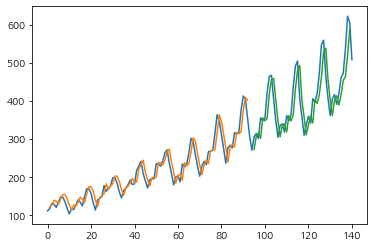

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()